# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Creating URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=76ee94eba5b0cc18ec4fbdbe85cb0620&units=imperial&q='

In [45]:
#list

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_tem = []
wind_speed = []




In [46]:
# Api Request and filling the list

print("Beginning Data Retrieval")
print("-----------------------------------")
cnt = 1    #Counter of Records

for c in cities:     
    
    try:   
        
        response = requests.get(query_url + c).json()  
  
    
        print(f"Processing Record {cnt} | {c}")   
        
        #filling the list from response from API
        
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])       
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_tem.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])    
    
# if citi can not found print "City not found"    
    except:
        
      print("City not found...  Skipping")  
    
    cnt = cnt + 1
                                                        
                      
print("-------------------------------------")                      
print("Data Retrieval Complete")
print("-------------------------------------")
    
                                    
                                    
    

Beginning Data Retrieval
-----------------------------------
Processing Record 1 | mys shmidta
City not found...  Skipping
Processing Record 2 | hendijan
City not found...  Skipping
Processing Record 3 | yanan
City not found...  Skipping
Processing Record 4 | asau
City not found...  Skipping
Processing Record 5 | hami
Processing Record 6 | maragogi
Processing Record 7 | kapaa
Processing Record 8 | port elizabeth
Processing Record 9 | qaanaaq
Processing Record 10 | hermanus
Processing Record 11 | samusu
City not found...  Skipping
Processing Record 12 | bilma
Processing Record 13 | tuktoyaktuk
Processing Record 14 | mandan
Processing Record 15 | ixtapa
Processing Record 16 | ancud
Processing Record 17 | huarmey
Processing Record 18 | bluff
Processing Record 19 | carutapera
Processing Record 20 | rikitea
Processing Record 21 | grand river south east
City not found...  Skipping
Processing Record 22 | mar del plata
Processing Record 23 | boyolangu
Processing Record 24 | cherskiy
Processing

Processing Record 230 | beringovskiy
Processing Record 231 | buin
Processing Record 232 | sala consilina
Processing Record 233 | bolshiye chapurniki
City not found...  Skipping
Processing Record 234 | turukhansk
Processing Record 235 | maceio
Processing Record 236 | kandi
Processing Record 237 | hilo
Processing Record 238 | payo
Processing Record 239 | gramoteino
Processing Record 240 | cotacachi
Processing Record 241 | urusha
Processing Record 242 | kybartai
Processing Record 243 | sentyabrskiy
City not found...  Skipping
Processing Record 244 | poya
Processing Record 245 | yelizovo
Processing Record 246 | ostrovnoy
Processing Record 247 | olafsvik
City not found...  Skipping
Processing Record 248 | kruisfontein
Processing Record 249 | vanavara
Processing Record 250 | zavidovici
Processing Record 251 | lebu
Processing Record 252 | georgetown
Processing Record 253 | caravelas
Processing Record 254 | eseka
Processing Record 255 | betafo
Processing Record 256 | nguiu
City not found...  S

Processing Record 457 | fjerritslev
Processing Record 458 | banjar
Processing Record 459 | makakilo city
Processing Record 460 | pindi gheb
Processing Record 461 | cassilandia
Processing Record 462 | puerto escondido
Processing Record 463 | kabanjahe
Processing Record 464 | la salle
Processing Record 465 | komsomolskiy
Processing Record 466 | jiuquan
Processing Record 467 | belyy yar
Processing Record 468 | oudtshoorn
Processing Record 469 | okhotsk
Processing Record 470 | narsaq
Processing Record 471 | port hardy
Processing Record 472 | saint-augustin
Processing Record 473 | cilegon
Processing Record 474 | portland
Processing Record 475 | broken hill
Processing Record 476 | cabra
Processing Record 477 | chumikan
Processing Record 478 | sjenica
Processing Record 479 | cabedelo
Processing Record 480 | bur gabo
City not found...  Skipping
Processing Record 481 | dujuma
City not found...  Skipping
Processing Record 482 | fukue
Processing Record 483 | jiayuguan
Processing Record 484 | pala

In [48]:
#Dictionary for cities
cities_dic = {
    
    "City" : city,
    "Cloudiness": cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitud" : lat,
    "Longitud" : lng,
    "Max_tem" : max_tem,
    "Wind_Speed" : wind_speed
}

#Data Frame for cities from  dictionary
cities_df = pd.DataFrame(cities_dic)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitud,Longitud,Max_tem,Wind_Speed
0,Hami,0,CN,1573933704,24,42.84,93.51,14.81,1.07
1,Maragogi,31,BR,1573933704,76,-9.01,-35.22,80.11,18.50
2,Kapaa,90,US,1573933655,83,22.08,-159.32,80.60,11.41
3,Port Elizabeth,1,US,1573933515,28,39.31,-74.98,45.00,17.22
4,Qaanaaq,100,GL,1573933705,90,77.48,-69.36,9.01,4.94


In [49]:
cities_df.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Latitud       523
Longitud      523
Max_tem       523
Wind_Speed    523
dtype: int64

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

<function matplotlib.pyplot.show(*args, **kw)>

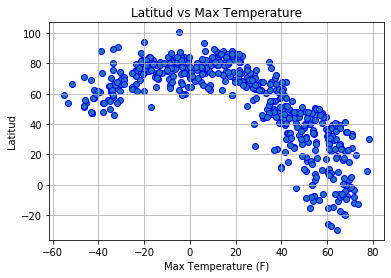

In [55]:
# Plotting Latitud vs Max Temp
plt.scatter(cities_df['Latitud'], cities_df['Max_tem'], edgecolor  ='b', marker = 'o')

plt.title('Latitud vs Max Temperature')
plt.ylabel('Latitud')
plt.xlabel('Max Temperature (F)')
plt.grid(True)
plt.savefig("Lat_Max_tem")
plt.show

#### Latitude vs. Temperature Plot

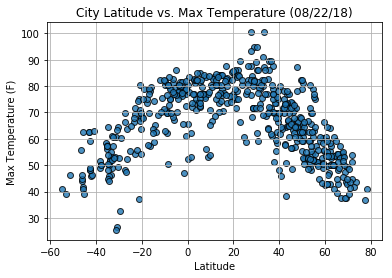

#### Latitude vs. Humidity Plot

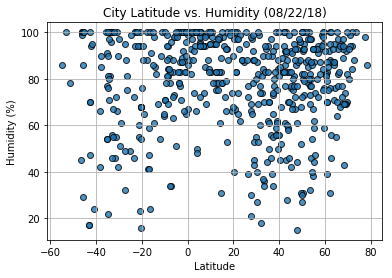

<function matplotlib.pyplot.show(*args, **kw)>

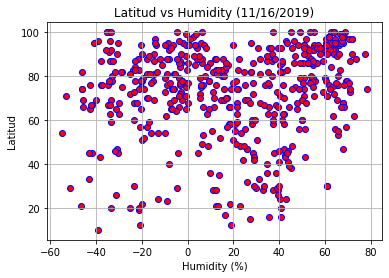

In [57]:
# Plotting Latitud vs Humidity
plt.scatter(cities_df['Latitud'], cities_df['Humidity'], edgecolor  ='b',color = 'r', marker = 'o')

plt.title('Latitud vs Humidity (11/16/2019)')
plt.ylabel('Latitud')
plt.xlabel('Humidity (%)')
plt.grid(True)
plt.savefig("Lat_Humi")
plt.show

#### Latitude vs. Cloudiness Plot

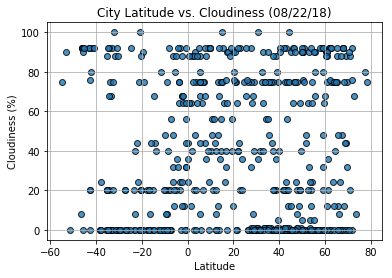

<function matplotlib.pyplot.show(*args, **kw)>

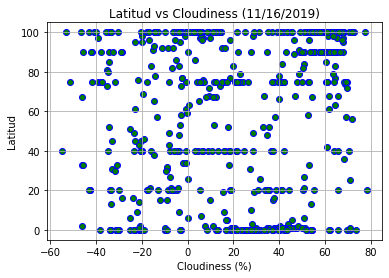

In [59]:
#Plotting Latitud vs Cloudiness
plt.scatter(cities_df['Latitud'], cities_df['Cloudiness'],color = 'g', edgecolor  ='b', marker = 'o')

plt.title('Latitud vs Cloudiness (11/16/2019)')
plt.ylabel('Latitud')
plt.xlabel('Cloudiness (%)')
plt.grid(True)
plt.savefig("Lat_Cloud")
plt.show

#### Latitude vs. Wind Speed Plot

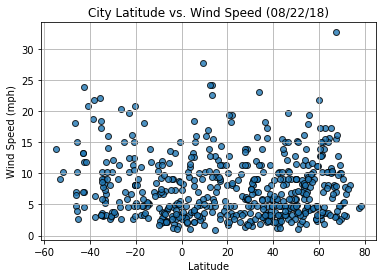

<function matplotlib.pyplot.show(*args, **kw)>

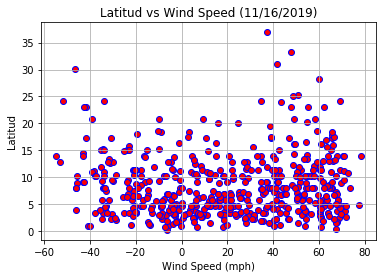

In [60]:
#Plotting Latitud vs Wind Speed

plt.scatter(cities_df['Latitud'], cities_df['Wind_Speed'],color ='r', edgecolor  ='b', marker = 'o')

plt.title('Latitud vs Wind Speed (11/16/2019)')
plt.ylabel('Latitud')
plt.xlabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig("Lat_Wind.png")
plt.show